# Tutorial to Use SplitWeightMap

Notes: <font color=blue>Blue colored</font>: function name, <font color=green>Green colored</font>: variable name


Let's start! Import <font color=blue>SplitWeightMap</font> Function:

In [1]:
from SplitWeightMap import *

As an example, let's fake a matrix called <font color=green>rMatrix</font>, and assume the "maximum current limit" <font color=green>nLim</font> is 3:

In [2]:
import pandas as pd
rMatrix = pd.read_csv('w_target.csv',header=None).to_numpy()
nLim = 8

Use <font color=blue>SplitWeightMap</font> Function and assign the output to <font color=green>rMatrixSplitted</font>:

In [3]:
rMatrixSplitted = SplitWeightMap (rMatrix, nLim)

Let's see results, visualization:

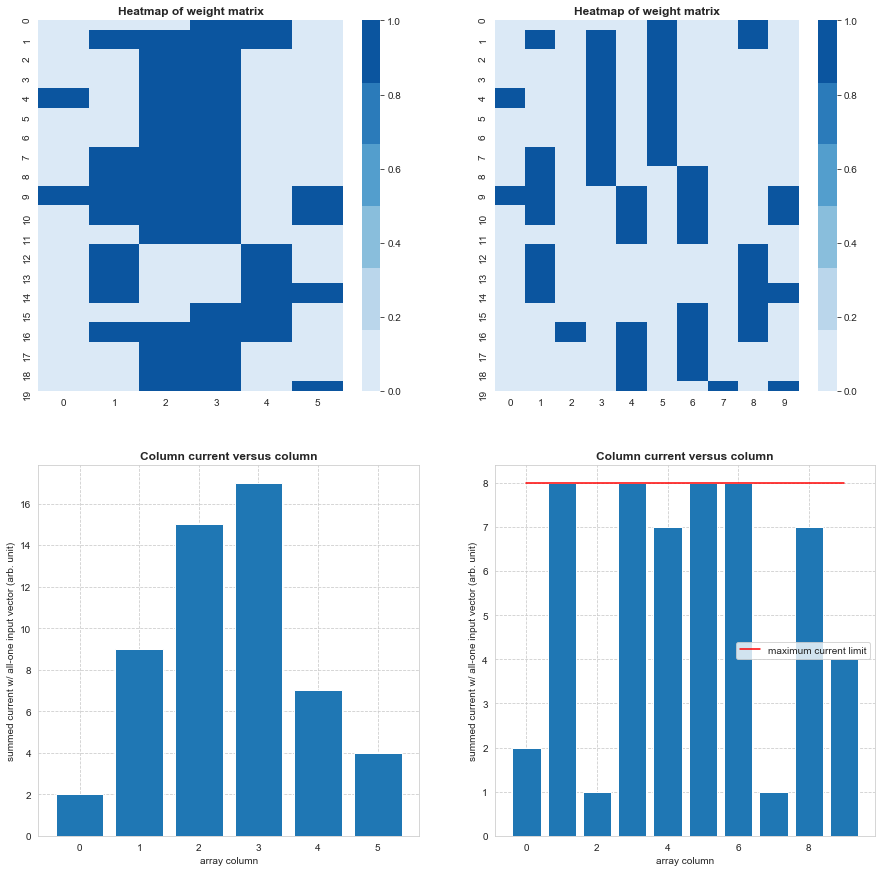

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

fig, ax = plt.subplots(2,2,figsize=(15,15))

sns.set_style("whitegrid",{'grid.linestyle': '--'})
cmap = sns.color_palette("Blues")
#cmap = "YlGnBu"
sns.heatmap(rMatrix, ax=ax[0,0], cmap=cmap)
sns.heatmap(rMatrixSplitted, ax=ax[0,1], cmap=cmap)
#related shape
r, c = rMatrix.shape
cAll = rMatrix.sum(axis=0)
cNew = np.array([math.ceil(z) for z in cAll/nLim]).sum()

ax[1,0].bar(range(c),cAll)
ax[1,0].set_xlabel('array column')
ax[1,0].set_ylabel('summed current w/ all-one input vector (arb. unit)')
ax[1,1].bar(range(cNew), rMatrixSplitted.sum(axis=0))
ax[1,1].set_xlabel('array column')
ax[1,1].set_ylabel('summed current w/ all-one input vector (arb. unit)')

ax[0,0].set_title('Heatmap of weight matrix',fontweight='bold')
ax[0,1].set_title('Heatmap of weight matrix',fontweight='bold')
ax[1,0].set_title('Column current versus column',fontweight='bold')
ax[1,1].set_title('Column current versus column',fontweight='bold')

# draw your maximum current limit
ax[1,1].plot(np.arange(cNew),np.ones(cNew)*nLim,'r', label='maximum current limit')
ax[1,1].legend()